---
---

# Miniproyecto 1

---
---

Nombre:
----------

Agustín Gagliardi Castro

Puntajes:
-----------

0.- 2 ptos.

1.- 20 ptos.

2.- 15 ptos.

3.- 30 ptos.

4.- 30 ptos.

5.- 3 ptos.

Total: 
-------
100 ptos.

## 0.- Cargar librerías y explicar sus usos (2 ptos.): 

Respuesta:
---
    
    
Aquí escribir la respuesta en markdown, en las celdas siguientes debe ir el código. Sólo usar markdown para comentar.

*Se utilizará la librería pandas para trabajar nuestro data set como un marco de datos y manipulación de ellos, por ejemplo, limpieza de los datos, selección y agrupación de datos, etc.*

*Se utilizará la librería numpy para el trabajo con matrices, el objetivo de la creación y manimulaciones de arrays y matrices, cálculos matemáticos y estadísticos, etc.*

*Además, se utilizará la librería matplotlib y seaborn para graficar la información y por último se utilizarán sklearn para las funciones de normalización y/o transformación de las variables cuantitativas.*

*Por último se utilizará la librería os para listar los archivos exportados en el directorio especificado*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os


## 1.- Cargar datasets y explorar los datos. Explicar las características de los dataset (estadísticas, datos Nan, datos únicos, etc.) (20 ptos.):

Apoyarse en la documentación de Pandas https://pandas.pydata.org/pandas-docs/stable/index.html y Seaborn https://seaborn.pydata.org/index.html

Respuesta:
---
    
    
Aquí escribir la respuesta en markdown, en las celdas siguientes debe ir el código. Sólo usar markdown para comentar.

*A continaución se procederá a describir las tres fuentes disponible de clientes para un banco. Hay que destacar que estas fuentes proporcionan información para los mismos 50 clientes.*

*Como se puede observar los tres archivos están en formato csv, pero con distintos delimitadores y además contienen diferentes columnas, por ejemplo, el primer archivo, correspondiente al Banco A está delimitado por punto y coma (;) mientras que los restantes están delimitados por comas (,).*

*Como segunda diferencia tenemos diferentes columnas o variables entre los tres dataframes, el archivo correspondiente a la fuente Banco A contiene 9 columnas donde solo coincide en 4 con la fuente Banco B (Id, name, age y day_of_week) donde éste contiene 11 columnas y el archivo correspondiente a la fuente Banco C (8 columnas) solo tienen en común los ID de los clientes respecto a los otros bancos (Id y name) en relación al Banco A. Por último, el archivo C tiene en común los id del clientes y los contactos respecto a la fuente B.*

*Además, hay que destacar que si bien todas de las columnas contienen datos, algunos son datos faltantes ( NaN) o unkown (Desconocidos o No informados). Sin embargo, entre las fuentes nombradas anteriormente se pueden rescatar los datos faltantes de las otras fuentes, por lo que se procederá a reemplazar estos datos.*

*Por último, se describirá estadísticamente la información o las variables recolectadas desde el marco de datos. Para mayor información sobre ellas, hay que explorara el archivo bank-additional-name.txt*


In [2]:
df1 = pd.read_csv('bank-A.csv',sep=";")
df2 = pd.read_csv('bank-B.csv',sep=",")
df3 = pd.read_csv('bank-C.csv',sep=",")

In [3]:
df1.head(6)


,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon
1,1536,1536,37.0,management,married,university.degree,no,yes,tue
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN
5,3686,3686,45.0,technician,married,basic.9y,unknown,no,fri


In [4]:
df2.head(6)


,Unnamed: 0,id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age
0,2292,2292,telephone,may,mon,231,1,999,1,failure,51.0
1,1536,1536,cellular,aug,tue,263,2,999,0,nonexistent,37.0
2,4047,4047,telephone,jun,wed,95,2,999,0,nonexistent,38.0
3,3862,3862,cellular,nov,fri,495,1,3,1,success,52.0
4,1340,1340,cellular,aug,wed,428,4,999,0,nonexistent,NaN
5,3686,3686,-,nov,fri,174,1,999,0,nonexistent,45.0


In [5]:
df3.head(6)

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact
0,2292,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,1.4,93.444,-36.1,4.964,5228.1,cellular
5,3686,3686,-0.1,93.200,-42.0,4.021,5195.8,cellular


In [6]:
# Dimensiones de los DataFrames
dfs = [df1, df2, df3]

# Iterar sobre la lista de DataFrames y obtener su forma
for i, df in enumerate(dfs, start=1):
    shape = df.shape
    print(f"df{i} tiene {shape[0]} filas y {shape[1]} columnas")


df1 tiene 50 filas y 9 columnas
df2 tiene 50 filas y 11 columnas
df3 tiene 50 filas y 8 columnas


In [7]:
# Columnas en común
dfs = [df1, df2, df3]

# Obtener las columnas comunes entre todos los DataFrames
common_columns_all = set(dfs[0].columns)
for df in dfs[1:]:
    common_columns_all &= set(df.columns)

print("Columnas comunes entre todos los DataFrames:", common_columns_all)

Columnas comunes entre todos los DataFrames: {'id', 'Unnamed: 0'}


In [8]:
# Columnas en común entre df1 y df2
dfs12 = [df1, df2]

# Obtener las columnas comunes entre d1 y d2
common_columns_all = set(dfs12[0].columns)
for df in dfs12[1:]:
    common_columns_all &= set(df.columns)

print("Columnas comunes entre todos los DataFrames:", common_columns_all)

Columnas comunes entre todos los DataFrames: {'id', 'day_of_week', 'age', 'Unnamed: 0'}


In [9]:
# Columnas en común entre df1 y df3
dfs13 = [df1, df3]

# Obtener las columnas comunes entre df1 y df3
common_columns_all = set(dfs13[0].columns)
for df in dfs13[1:]:
    common_columns_all &= set(df.columns)

print("Columnas comunes entre todos los DataFrames:", common_columns_all)

Columnas comunes entre todos los DataFrames: {'id', 'Unnamed: 0'}


In [10]:
# Columnas en común entre df2 y df3
dfs23 = [df2, df3]

# Obtener las columnas comunes entre df2 y df3
common_columns_all = set(dfs23[0].columns)
for df in dfs23[1:]:
    common_columns_all &= set(df.columns)

print("Columnas comunes entre todos los DataFrames:", common_columns_all)

Columnas comunes entre todos los DataFrames: {'id', 'contact', 'Unnamed: 0'}


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50 non-null     int64  
 1   id           50 non-null     int64  
 2   age          42 non-null     float64
 3   job          50 non-null     object 
 4   marital      50 non-null     object 
 5   education    50 non-null     object 
 6   default      50 non-null     object 
 7   housing      50 non-null     object 
 8   day_of_week  42 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.6+ KB


In [12]:
df1.describe()


,Unnamed: 0,id,age
count,50.000000,50.000000,42.000000
mean,2461.900000,2461.900000,40.357143
std,1047.344129,1047.344129,9.084485
min,257.000000,257.000000,27.000000
25%,1553.750000,1553.750000,31.250000
50%,2486.000000,2486.000000,38.000000
75%,3407.000000,3407.000000,48.500000
max,4047.000000,4047.000000,57.000000


In [13]:
# Filtrar las columnas de tipo float
float_columns = df1.select_dtypes(include='object')

# Crear un diccionario para almacenar las tablas de frecuencia
frequency_tables = {}

# Generar la tabla de frecuencia para cada columna de tipo object
for col in float_columns.columns:
    frequency_tables[col] = float_columns[col].value_counts().reset_index()
    frequency_tables[col].columns = [col, 'frequency']

# Mostrar las tablas de frecuencia
for col, freq_table in frequency_tables.items():
    print(f"Tabla de frecuencia para la columna '{col}':")
    print(freq_table)
    print()


Tabla de frecuencia para la columna 'job':
             job  frequency
0    blue-collar         13
1     technician         13
2         admin.         11
3     management          5
4  self-employed          3
5   entrepreneur          2
6       services          2
7        retired          1

Tabla de frecuencia para la columna 'marital':
    marital  frequency
0   married         29
1  divorced         11
2    single         10

Tabla de frecuencia para la columna 'education':
             education  frequency
0    university.degree         15
1          high.school         14
2             basic.9y          8
3  professional.course          5
4             basic.4y          4
5             basic.6y          3
6              unknown          1

Tabla de frecuencia para la columna 'default':
   default  frequency
0       no         37
1  unknown         13

Tabla de frecuencia para la columna 'housing':
   housing  frequency
0      yes         27
1       no         22
2  unknown     

In [14]:
df1_duplicados = df1.duplicated(subset='id', keep=False)

# Mostrar las filas duplicadas
filas_duplicadas = df1[df1_duplicados]

# Mostrar las filas duplicadas y contar cuántas son
print(filas_duplicadas)
print(f"Hay {filas_duplicadas.shape[0]} filas duplicadas en la columna 'id'.")

Empty DataFrame
Columns: [Unnamed: 0, id, age, job, marital, education, default, housing, day_of_week]
Index: []
Hay 0 filas duplicadas en la columna 'id'.


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50 non-null     int64  
 1   id           50 non-null     int64  
 2   contact      50 non-null     object 
 3   month        50 non-null     object 
 4   day_of_week  42 non-null     object 
 5   duration     50 non-null     int64  
 6   campaign     50 non-null     int64  
 7   pdays        50 non-null     int64  
 8   previous     50 non-null     int64  
 9   poutcome     50 non-null     object 
 10  age          42 non-null     float64
dtypes: float64(1), int64(6), object(4)
memory usage: 4.4+ KB


In [16]:
df2.describe()

,Unnamed: 0,id,duration,campaign,pdays,previous,age
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,42.000000
mean,2461.900000,2461.900000,270.100000,2.280000,979.080000,0.120000,40.880952
std,1047.344129,1047.344129,204.363147,1.917056,140.855671,0.328261,9.292542
min,257.000000,257.000000,68.000000,1.000000,3.000000,0.000000,26.000000
25%,1553.750000,1553.750000,160.250000,1.000000,999.000000,0.000000,33.000000
50%,2486.000000,2486.000000,198.500000,2.000000,999.000000,0.000000,38.000000
75%,3407.000000,3407.000000,303.750000,3.000000,999.000000,0.000000,50.500000
max,4047.000000,4047.000000,1259.000000,12.000000,999.000000,1.000000,57.000000


In [17]:
# Filtrar las columnas de tipo float
float_columns = df2.select_dtypes(include='object')

# Crear un diccionario para almacenar las tablas de frecuencia
frequency_tables = {}

# Generar la tabla de frecuencia para cada columna de tipo object
for col in float_columns.columns:
    frequency_tables[col] = float_columns[col].value_counts().reset_index()
    frequency_tables[col].columns = [col, 'frequency']

# Mostrar las tablas de frecuencia
for col, freq_table in frequency_tables.items():
    print(f"Tabla de frecuencia para la columna '{col}':")
    print(freq_table)
    print()


Tabla de frecuencia para la columna 'contact':
     contact  frequency
0   cellular         26
1  telephone         16
2          -          8

Tabla de frecuencia para la columna 'month':
  month  frequency
0   may         20
1   nov          9
2   jul          8
3   aug          7
4   jun          4
5   apr          2

Tabla de frecuencia para la columna 'day_of_week':
  day_of_week  frequency
0         wed         13
1         fri          9
2         mon          7
3         thu          7
4         tue          6

Tabla de frecuencia para la columna 'poutcome':
      poutcome  frequency
0  nonexistent         44
1      failure          5
2      success          1



In [18]:
df2_duplicados = df2.duplicated(subset='id', keep=False)

# Mostrar las filas duplicadas
filas_duplicadas = df2[df2_duplicados]

# Mostrar las filas duplicadas y contar cuántas son
print(filas_duplicadas)
print(f"Hay {filas_duplicadas.shape[0]} filas duplicadas en la columna 'id'.")

Empty DataFrame
Columns: [Unnamed: 0, id, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, age]
Index: []
Hay 0 filas duplicadas en la columna 'id'.


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   emp.var.rate    50 non-null     float64
 3   cons.price.idx  50 non-null     float64
 4   cons.conf.idx   50 non-null     float64
 5   euribor3m       50 non-null     float64
 6   nr.employed     50 non-null     float64
 7   contact         50 non-null     object 
dtypes: float64(5), int64(2), object(1)
memory usage: 3.3+ KB


In [20]:
# Filtrar las columnas de tipo float
float_columns = df3.select_dtypes(include='object')

# Crear un diccionario para almacenar las tablas de frecuencia
frequency_tables = {}

# Generar la tabla de frecuencia para cada columna de tipo object
for col in float_columns.columns:
    frequency_tables[col] = float_columns[col].value_counts().reset_index()
    frequency_tables[col].columns = [col, 'frequency']

# Mostrar las tablas de frecuencia
for col, freq_table in frequency_tables.items():
    print(f"Tabla de frecuencia para la columna '{col}':")
    print(freq_table)
    print()


Tabla de frecuencia para la columna 'contact':
     contact  frequency
0   cellular         26
1  telephone         16
2    NO INFO          8



In [21]:
df3.describe()

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2461.900000,2461.900000,0.324000,93.588360,-40.062000,3.965080,5181.00800
std,1047.344129,1047.344129,1.392188,0.514534,4.143295,1.532579,57.86105
min,257.000000,257.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000
25%,1553.750000,1553.750000,-0.100000,93.200000,-42.700000,4.087000,5191.00000
50%,2486.000000,2486.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000
75%,3407.000000,3407.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000
max,4047.000000,4047.000000,1.400000,94.465000,-30.100000,4.968000,5228.10000


In [22]:
df3_duplicados = df3.duplicated(subset='id', keep=False)

# Mostrar las filas duplicadas
filas_duplicadas = df3[df3_duplicados]

# Mostrar las filas duplicadas y contar cuántas son
print(filas_duplicadas)
print(f"Hay {filas_duplicadas.shape[0]} filas duplicadas en la columna 'id'.")

Empty DataFrame
Columns: [Unnamed: 0, id, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, contact]
Index: []
Hay 0 filas duplicadas en la columna 'id'.


## 2.- Generar dos graficos que caractericen los datos y explicarlos (15 ptos.):

Apoyarse en la documentación de Matplotlib https://matplotlib.org/ y Seaborn https://seaborn.pydata.org/index.html 

Respuesta:
---
    
    
Aquí escribir la respuesta en markdown, en las celdas siguientes debe ir el código. Sólo usar markdown para comentar.

*Como las tres fuentes proporcionan diferente información sobre los 50 clientes, se tomarán dos variables para caracterizarlos. La primera variable que se elegió es el tipo de trabajo (job), esta es una variable cualitativa donde indica que la mayoría trabajan como obreros (Blue-collar) y oficios de técnicos. En menor frecuencia les siguen los trabajos administrativos*

*Siguiendo el análisis con otra variable, por ejemplo el estado civil (marital), se puede decir que el 58% de los clientes de este banco están casados, el 22% de ellos está divorciado y el 20% está soltero*

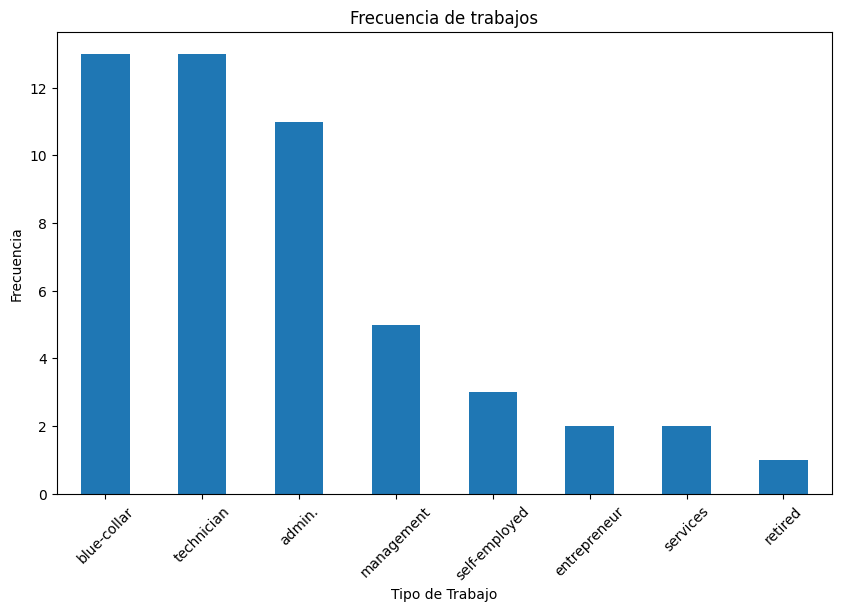

In [23]:
# Gráfico de barras para job (tipos de trabajos)

# Contar la frecuencia de cada categoría en la columna 'job'
job_counts = df1['job'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
job_counts.plot(kind='bar')
plt.title('Frecuencia de trabajos')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


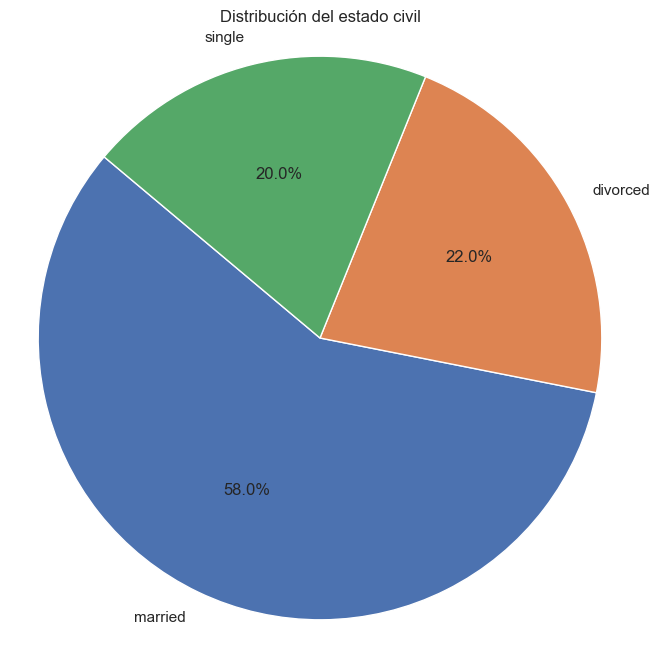

In [24]:
# Gráfico de barras para marital (estado civil)

# Contar la frecuencia de cada categoría en la columna 'marital'
marital_counts = df1['marital'].value_counts()

# Aplicar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico circular
plt.figure(figsize=(8,8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del estado civil')
plt.axis('equal')  # Para asegurar que el gráfico sea circular

plt.show()


## 3.- Unir datasets, explicar el tipo de unión y atributo escogido para la unión 
## Complementar información entre atributos, eliminar atributos innecesarios. Explicar las decisiones tomadas (30 ptos.):

Apoyarse en la documentación de Pandas para los distintos tipos de uniones https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html


*Se procederá a unir las tres bases de datos, el atributo que servirá como llave primaria para la unión de estos data frame será el id del cliente y el tipo de cruce entre las bases será igual a igual*



Respuesta:
---

Aquí escribir la respuesta en markdown, en las celdas siguientes debe ir el código. Sólo usar markdown para comentar.

*Se procederá a unir las tres bases de datos, el atributo que servirá como llave primaria para la unión de estos data frame será el id del cliente y el tipo de cruce entre las bases será igual a igual.*

*Luego se imputará la información faltante, pero disponible en las otras fuentes, para ellos se creará una nueva columna comparativa, donde si los datos son los mismos entre las fuentes, será True, caso contrario, será False. Luego, los datos indentificados como False se imputarán con los datos disponibles desde las otras fuentes.*

*Por último, se eliminarán las columnas innecesarias, como las generas desde la unión y las columnas creadas para identificar los datos faltantes. Como se podrá observar, se generó una imputación correcta y sólo la variable day of week quedó con dos datos faltantes (NaN), es decir, no se pudieron imputar.*



In [25]:
df = pd.merge(df1,df2, left_on='id', right_on='id')
df.head()

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,Unnamed: 0_y,contact,month,day_of_week_y,duration,campaign,pdays,previous,poutcome,age_y
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,2292,telephone,may,mon,231,1,999,1,failure,51.0
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,1536,cellular,aug,tue,263,2,999,0,nonexistent,37.0
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,4047,telephone,jun,wed,95,2,999,0,nonexistent,38.0
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,3862,cellular,nov,fri,495,1,3,1,success,52.0
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,1340,cellular,aug,wed,428,4,999,0,nonexistent,NaN


In [26]:
df = pd.merge(df,df3, left_on='id', right_on='id')
df.head()

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,Unnamed: 0_y,...,previous,poutcome,age_y,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,2292,...,1,failure,51.0,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,1536,...,0,nonexistent,37.0,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,4047,...,0,nonexistent,38.0,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,3862,...,1,success,52.0,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,1340,...,0,nonexistent,NaN,1340,1.4,93.444,-36.1,4.964,5228.1,cellular


In [27]:
df.head()

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,Unnamed: 0_y,...,previous,poutcome,age_y,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,2292,...,1,failure,51.0,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,1536,...,0,nonexistent,37.0,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,4047,...,0,nonexistent,38.0,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,3862,...,1,success,52.0,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,1340,...,0,nonexistent,NaN,1340,1.4,93.444,-36.1,4.964,5228.1,cellular


In [28]:
# Crear nuevas columnas con valores True/False para la comparación entre las mismas variables, desde diferentes fuentes
df['age_equal'] = df['age_x'] == df['age_y']
df['day_of_week_equal'] = df['day_of_week_x'] == df['day_of_week_y']
df['contact_equal'] = df['contact_x'] == df['contact_y']
df.head(6)

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,Unnamed: 0_y,...,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y,age_equal,day_of_week_equal,contact_equal
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,2292,...,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone,True,True,True
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,1536,...,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO,True,True,False
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,4047,...,4047,1.4,94.465,-41.8,4.959,5228.1,telephone,True,True,True
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,3862,...,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular,False,True,True
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,1340,...,1340,1.4,93.444,-36.1,4.964,5228.1,cellular,False,False,True
5,3686,3686,45.0,technician,married,basic.9y,unknown,no,fri,3686,...,3686,-0.1,93.200,-42.0,4.021,5195.8,cellular,True,True,False


In [29]:
# Imputar valores faltantes para 'age'. Indentificados como falsos en la nueva columna
df['age'] = np.where(df['age_equal'], df['age_x'], df[['age_x', 'age_y']].bfill(axis=1).iloc[:, 0])

# Imputar valores faltantes para 'day_of_week'. Indentificados como falsos en la nueva columna
df['day_of_week'] = np.where(df['day_of_week_equal'], df['day_of_week_x'], df[['day_of_week_x', 'day_of_week_y']].bfill(axis=1).iloc[:, 0])

# Valores válidos
valid_contacts = ['telephone', 'cellular']

# Imputar con los valores vádilos 
df['contact'] = np.where(
    df['contact_equal'], 
    df['contact_y'], 
    df[['contact_y', 'contact_x']].apply(lambda x: next((c for c in x if c in valid_contacts), np.nan), axis=1)
)


In [30]:
#Eliminar las variables innecesarias  y mostrar las 6 primeras filas de df
df = df.drop(labels=["Unnamed: 0_x","Unnamed: 0_y","age_x","age_y","age_equal","day_of_week_x","day_of_week_y","day_of_week_equal","contact_x","contact_y","contact_equal"], axis=1)
df.head(6)

,id,job,marital,education,default,housing,month,duration,campaign,pdays,...,poutcome,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,day_of_week,contact
0,2292,entrepreneur,divorced,university.degree,no,yes,may,231,1,999,...,failure,2292,-1.8,92.893,-46.2,1.299,5099.1,51.0,mon,telephone
1,1536,management,married,university.degree,no,yes,aug,263,2,999,...,nonexistent,1536,1.4,93.444,-36.1,4.968,5228.1,37.0,tue,cellular
2,4047,blue-collar,married,basic.4y,unknown,no,jun,95,2,999,...,nonexistent,4047,1.4,94.465,-41.8,4.959,5228.1,38.0,wed,telephone
3,3862,technician,married,professional.course,no,yes,nov,495,1,3,...,success,3862,-3.4,92.649,-30.1,0.714,5017.5,52.0,fri,cellular
4,1340,admin.,married,university.degree,no,yes,aug,428,4,999,...,nonexistent,1340,1.4,93.444,-36.1,4.964,5228.1,32.0,wed,cellular
5,3686,technician,married,basic.9y,unknown,no,nov,174,1,999,...,nonexistent,3686,-0.1,93.200,-42.0,4.021,5195.8,45.0,fri,cellular


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50 non-null     int64  
 1   job             50 non-null     object 
 2   marital         50 non-null     object 
 3   education       50 non-null     object 
 4   default         50 non-null     object 
 5   housing         50 non-null     object 
 6   month           50 non-null     object 
 7   duration        50 non-null     int64  
 8   campaign        50 non-null     int64  
 9   pdays           50 non-null     int64  
 10  previous        50 non-null     int64  
 11  poutcome        50 non-null     object 
 12  Unnamed: 0      50 non-null     int64  
 13  emp.var.rate    50 non-null     float64
 14  cons.price.idx  50 non-null     float64
 15  cons.conf.idx   50 non-null     float64
 16  euribor3m       50 non-null     float64
 17  nr.employed     50 non-null     float

## 4.- Transformar a formato pedido en tabla output.csv, el resultado debe quedar igual a la tabla presentada en el archivo output.csv
## Normalizar los datos numéricos, explicar el tipo de normalización utilizada (recordar que es normalización de datos y no normalización de base de datos, i.e. Standard Scaler, MinMax Scaler, etc.) (30 ptos.):

Apoyarse en la documentación de Scikit-Learn para los distintos tipos de normalización de datos https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

*Este análisis se dividirá en dos partes. La primera tiene que ver con la transformación de la base de datos (dejarla igual que el archivo output.csv) y la segunda tiene que ver con la normalización de las variables cuantitativas.* 

*Primero, se abrió el archivo output.csv para poder realizar la comparación. Se identificaron numerosas diferencias entre la base df y output. A continuación, se enumerarán las diferencias:* 

*1. La primera diferencia es que todas las columnas de output contienen 50 datos mientras que desde df la variable day_of_week contiene 48 filas. Para dejar igual en las bases se imputaron los datos faltantes en función a lo contenido en output.*

*2. Se encontraron diferencias en la codificación de los datos entre ambos data frames. A modo de ejemplo, en output ‘age’ está codificado como ‘54 years’, mientras que en df como '54', ‘day_of_week’ en output está codificado como ‘monday’ y en df como ‘mon’. Lo mismo ocurre con los datos de poutcome, education, default, month y housing.*

*Finalmente, y luego de dejar los datos de df igual al dataframe output, se procedió a transformar las variables cuantitativas, se realizará una exploración gráfica de ellos llegando a la conclusión que la mayoría no tiene la forma de una distribución normal, por lo que se procederá a una transformación minmax Scaler, acotando todas las variables cuantitativas entre 0 y 1.* 


Respuesta:
---

Aquí escribir la respuesta en markdown, en las celdas siguientes debe ir el código. Sólo usar markdown para comentar.




In [32]:
# Leer el archivo output con el objetivo de dejar nuestro archivo igual a lo pedido
df_out = pd.read_csv('output.csv',sep=",")
df_out.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2292,2292,51 years,entrepreneur,divorced,university degree,no,yes,no,telephone,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
1,1536,1536,37 years,management,married,university degree,no,yes,no,cellular,...,2,999,0,not existent,1.4,93.444,-36.1,4.968,5228.1,no
2,4047,4047,38 years,blue-collar,married,basic 4y,,no,no,telephone,...,2,999,0,not existent,1.4,94.465,-41.8,4.959,5228.1,no
3,3862,3862,52 years,technician,married,professional course,no,yes,no,cellular,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,yes
4,1340,1340,32 years,admin.,married,university degree,no,yes,no,cellular,...,4,999,0,not existent,1.4,93.444,-36.1,4.964,5228.1,no


In [33]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   age             50 non-null     object 
 3   job             50 non-null     object 
 4   marital         50 non-null     object 
 5   education       50 non-null     object 
 6   default         50 non-null     object 
 7   housing         50 non-null     object 
 8   loan            50 non-null     object 
 9   contact         50 non-null     object 
 10  month           50 non-null     object 
 11  day_of_week     50 non-null     object 
 12  duration        50 non-null     int64  
 13  campaign        50 non-null     int64  
 14  pdays           50 non-null     int64  
 15  previous        50 non-null     int64  
 16  poutcome        50 non-null     object 
 17  emp.var.rate    50 non-null     float

In [34]:
#Primera diferencia:
# day_of_week desde df_out tiene 50 datos, exploremos esto:
print(df_out['day_of_week'].value_counts())


day_of_week
wednesday    15
thursday     10
monday        9
friday        9
tuesday       7
Name: count, dtype: int64


In [35]:
# Mientras que day_of_week desde df tiene 48 datos, exploremos esto:
print(df['day_of_week'].value_counts())


day_of_week
wed    14
mon     9
fri     9
thu     9
tue     7
Name: count, dtype: int64


In [36]:
#Veamos los datos faltantes de day_of_week desde df
nan_rows = df.loc[df['day_of_week'].isna()]
nan_rows.head()
# las filas con day_of_week NaN corresponde a los id 3338 y 2388

,id,job,marital,education,default,housing,month,duration,campaign,pdays,...,poutcome,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,day_of_week,contact
27,3338,self-employed,single,professional.course,no,no,nov,139,1,999,...,nonexistent,3338,-0.1,93.200,-42.0,4.076,5195.8,52.0,NaN,cellular
47,2388,technician,married,high.school,no,no,may,208,3,999,...,nonexistent,2388,1.1,93.994,-36.4,4.858,5191.0,35.0,NaN,telephone


In [37]:
# Extraer filas con id igual a 3338 y 2388 desde df_out
filtered_df = df_out.loc[df_out['id'].isin([3338, 2388])]
# Extraer la columna 'day_of_week'
day_of_week_values = filtered_df['day_of_week']
day_of_week_values.head()

27     thursday
47    wednesday
Name: day_of_week, dtype: object

In [38]:
#Se detectaron las filas con los datos correspondiente, listo para reemplazar.
df.loc[df['id'] == 3338, 'day_of_week'] = 'thu'
df.loc[df['id'] == 2388, 'day_of_week'] = 'wed'


In [39]:
#Segunda diferencia day_of_week desde df está abreviado y desde df_out está completo. 

# Definir el mapeo de los valores
mapping = {
    'wed': 'wednesday',
    'thu': 'thursday',
    'mon': 'monday',
    'fri': 'friday',
    'tue': 'tuesday'
}

# Reemplazar los valores en la columna 'day_of_week' según el mapeo en tu DataFrame original
df['day_of_week'] = df['day_of_week'].replace(mapping)

df.head()


,id,job,marital,education,default,housing,month,duration,campaign,pdays,...,poutcome,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,day_of_week,contact
0,2292,entrepreneur,divorced,university.degree,no,yes,may,231,1,999,...,failure,2292,-1.8,92.893,-46.2,1.299,5099.1,51.0,monday,telephone
1,1536,management,married,university.degree,no,yes,aug,263,2,999,...,nonexistent,1536,1.4,93.444,-36.1,4.968,5228.1,37.0,tuesday,cellular
2,4047,blue-collar,married,basic.4y,unknown,no,jun,95,2,999,...,nonexistent,4047,1.4,94.465,-41.8,4.959,5228.1,38.0,wednesday,telephone
3,3862,technician,married,professional.course,no,yes,nov,495,1,3,...,success,3862,-3.4,92.649,-30.1,0.714,5017.5,52.0,friday,cellular
4,1340,admin.,married,university.degree,no,yes,aug,428,4,999,...,nonexistent,1340,1.4,93.444,-36.1,4.964,5228.1,32.0,wednesday,cellular


In [40]:
# Tercera diferencia, al parecer entre ambos data frame cambiaron los tipos de datos y cofificaciones, exploremos:

# Obtener nombres de columnas de tipo float en df y df_out
float_cols_df = set(df.select_dtypes(include=['float']).columns)
float_cols_df_out = set(df_out.select_dtypes(include=['float']).columns)

# Obtener nombres de columnas de tipo int en df y df_out
int_cols_df = set(df.select_dtypes(include=['int']).columns)
int_cols_df_out = set(df_out.select_dtypes(include=['int']).columns)

# Obtener nombres de columnas de tipo object en df y df_out
object_cols_df = set(df.select_dtypes(include=['object']).columns)
object_cols_df_out = set(df_out.select_dtypes(include=['object']).columns)

# Encontrar diferencias en nombres de columnas entre df y df_out
diff_float_cols = float_cols_df.symmetric_difference(float_cols_df_out)
diff_int_cols = int_cols_df.symmetric_difference(int_cols_df_out)
diff_object_cols = object_cols_df.symmetric_difference(object_cols_df_out)

# Imprimir las diferencias encontradas
print("Diferencias en columnas de tipo float:")
print(diff_float_cols)
print("\nDiferencias en columnas de tipo int:")
print(diff_int_cols)
print("\nDiferencias en columnas de tipo object:")
print(diff_object_cols)

Diferencias en columnas de tipo float:
{'age'}

Diferencias en columnas de tipo int:
set()

Diferencias en columnas de tipo object:
{'y', 'loan', 'age'}


In [41]:
# La columna age en df_out es un object , si se observa este data frame, age está acompañado por 'years'. Hay que transformar los datos de esta columna.

df['age'] = df['age'].astype(int).astype(str) + ' years'

In [42]:
df.head()

,id,job,marital,education,default,housing,month,duration,campaign,pdays,...,poutcome,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,day_of_week,contact
0,2292,entrepreneur,divorced,university.degree,no,yes,may,231,1,999,...,failure,2292,-1.8,92.893,-46.2,1.299,5099.1,51 years,monday,telephone
1,1536,management,married,university.degree,no,yes,aug,263,2,999,...,nonexistent,1536,1.4,93.444,-36.1,4.968,5228.1,37 years,tuesday,cellular
2,4047,blue-collar,married,basic.4y,unknown,no,jun,95,2,999,...,nonexistent,4047,1.4,94.465,-41.8,4.959,5228.1,38 years,wednesday,telephone
3,3862,technician,married,professional.course,no,yes,nov,495,1,3,...,success,3862,-3.4,92.649,-30.1,0.714,5017.5,52 years,friday,cellular
4,1340,admin.,married,university.degree,no,yes,aug,428,4,999,...,nonexistent,1340,1.4,93.444,-36.1,4.964,5228.1,32 years,wednesday,cellular


In [43]:
#Debido a las diferencias encontradas, se realizará una comparación general de las demás variables:

# Identificar columnas de tipo object en ambos DataFrames
object_columns_df = df.select_dtypes(include=['object']).columns
object_columns_df_out = df_out.select_dtypes(include=['object']).columns

# Encontrar columnas comunes de tipo object
common_object_columns = set(object_columns_df).intersection(object_columns_df_out)

# Crear un diccionario para almacenar las comparaciones
comparison_results = {}

# Comparar las categorías de las columnas comunes
for column in common_object_columns:
    categories_df = set(df[column].unique())
    categories_df_out = set(df_out[column].unique())
    
    comparison_results[column] = {
        'categories_df': categories_df,
        'categories_df_out': categories_df_out,
        'common_categories': categories_df.intersection(categories_df_out),
        'unique_to_df': categories_df - categories_df_out,
        'unique_to_df_out': categories_df_out - categories_df
    }

# Mostrar los resultados
for column, result in comparison_results.items():
    print(f"Column: {column}")
    print(f"Categories in df: {result['categories_df']}")
    print(f"Categories in df_out: {result['categories_df_out']}")
    print(f"Common categories: {result['common_categories']}")
    print(f"Unique to df: {result['unique_to_df']}")
    print(f"Unique to df_out: {result['unique_to_df_out']}")
    print("\n")


Column: marital
Categories in df: {'divorced', 'married', 'single'}
Categories in df_out: {'divorced', 'married', 'single'}
Common categories: {'divorced', 'married', 'single'}
Unique to df: set()
Unique to df_out: set()


Column: default
Categories in df: {'no', 'unknown'}
Categories in df_out: {'no', ' '}
Common categories: {'no'}
Unique to df: {'unknown'}
Unique to df_out: {' '}


Column: day_of_week
Categories in df: {'tuesday', 'thursday', 'wednesday', 'monday', 'friday'}
Categories in df_out: {'tuesday', 'thursday', 'wednesday', 'monday', 'friday'}
Common categories: {'tuesday', 'thursday', 'wednesday', 'monday', 'friday'}
Unique to df: set()
Unique to df_out: set()


Column: age
Categories in df: {'40 years', '31 years', '37 years', '26 years', '33 years', '53 years', '36 years', '27 years', '41 years', '54 years', '57 years', '49 years', '45 years', '43 years', '51 years', '38 years', '32 years', '30 years', '52 years', '35 years', '47 years', '46 years', '55 years'}
Categories

In [44]:
# En el análisis anterior, se observa que casi todas las columnas object tienen codificaciones diferentes entre los data frame, por lo que hay que igualar
# Y Reemplazar en función a df_out
df['default'] = df['default'].replace({'unknown': ' '})
df['housing'] = df['housing'].replace({'unknown': ' '})
df['poutcome'] = df['poutcome'].replace({'nonexistent': 'not existent'})
month_replacements = {
    'apr': 'april',
    'jul': 'july',
    'aug': 'august',
    'jun': 'june',
    'nov': 'november'
}
df['month'] = df['month'].replace(month_replacements)

education_replacements = {
    'basic.9y': 'basic 9y',
    'basic.4y': 'basic 4y',
    'basic.6y': 'basic 6y',
    'university.degree': 'university degree',
    'professional.course': 'professional course',
    'high.school': 'high school'
}

df['education'] = df['education'].replace(education_replacements)

df.head()

,id,job,marital,education,default,housing,month,duration,campaign,pdays,...,poutcome,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,day_of_week,contact
0,2292,entrepreneur,divorced,university degree,no,yes,may,231,1,999,...,failure,2292,-1.8,92.893,-46.2,1.299,5099.1,51 years,monday,telephone
1,1536,management,married,university degree,no,yes,august,263,2,999,...,not existent,1536,1.4,93.444,-36.1,4.968,5228.1,37 years,tuesday,cellular
2,4047,blue-collar,married,basic 4y,,no,june,95,2,999,...,not existent,4047,1.4,94.465,-41.8,4.959,5228.1,38 years,wednesday,telephone
3,3862,technician,married,professional course,no,yes,november,495,1,3,...,success,3862,-3.4,92.649,-30.1,0.714,5017.5,52 years,friday,cellular
4,1340,admin.,married,university degree,no,yes,august,428,4,999,...,not existent,1340,1.4,93.444,-36.1,4.964,5228.1,32 years,wednesday,cellular


In [45]:
# Comparación de las columnas numéricas visulmente mediante estadísticos descriptivos:

df_out.describe()

,Unnamed: 0,id,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2461.900000,2461.900000,270.100000,2.280000,979.080000,0.120000,0.324000,93.588360,-40.062000,3.965080,5181.00800
std,1047.344129,1047.344129,204.363147,1.917056,140.855671,0.328261,1.392188,0.514534,4.143295,1.532579,57.86105
min,257.000000,257.000000,68.000000,1.000000,3.000000,0.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000
25%,1553.750000,1553.750000,160.250000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.700000,4.087000,5191.00000
50%,2486.000000,2486.000000,198.500000,2.000000,999.000000,0.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000
75%,3407.000000,3407.000000,303.750000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000
max,4047.000000,4047.000000,1259.000000,12.000000,999.000000,1.000000,1.400000,94.465000,-30.100000,4.968000,5228.10000


In [46]:
df.describe()

,id,duration,campaign,pdays,previous,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2461.900000,270.100000,2.280000,979.080000,0.120000,2461.900000,0.324000,93.588360,-40.062000,3.965080,5181.00800
std,1047.344129,204.363147,1.917056,140.855671,0.328261,1047.344129,1.392188,0.514534,4.143295,1.532579,57.86105
min,257.000000,68.000000,1.000000,3.000000,0.000000,257.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000
25%,1553.750000,160.250000,1.000000,999.000000,0.000000,1553.750000,-0.100000,93.200000,-42.700000,4.087000,5191.00000
50%,2486.000000,198.500000,2.000000,999.000000,0.000000,2486.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000
75%,3407.000000,303.750000,3.000000,999.000000,0.000000,3407.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000
max,4047.000000,1259.000000,12.000000,999.000000,1.000000,4047.000000,1.400000,94.465000,-30.100000,4.968000,5228.10000


In [47]:
#Ordenamos las columnas de acuerdo al archivo output.csv

df= df[['Unnamed: 0','id','age','job','marital','education','default','housing','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
df.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,2292,51 years,entrepreneur,divorced,university degree,no,yes,telephone,may,...,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,1536,37 years,management,married,university degree,no,yes,cellular,august,...,263,2,999,0,not existent,1.4,93.444,-36.1,4.968,5228.1
2,4047,4047,38 years,blue-collar,married,basic 4y,,no,telephone,june,...,95,2,999,0,not existent,1.4,94.465,-41.8,4.959,5228.1
3,3862,3862,52 years,technician,married,professional course,no,yes,cellular,november,...,495,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5
4,1340,1340,32 years,admin.,married,university degree,no,yes,cellular,august,...,428,4,999,0,not existent,1.4,93.444,-36.1,4.964,5228.1


In [48]:
descripcion_df = df.describe()
descripcion_df_out = df_out.describe()

# Verificar si los resultados son iguales
if descripcion_df.equals(descripcion_df_out):
    print("Los resultados de df.describe() y df_out.describe() son iguales.")
else:
    print("Los resultados de df.describe() y df_out.describe() son diferentes.")


Los resultados de df.describe() y df_out.describe() son iguales.


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   age             50 non-null     object 
 3   job             50 non-null     object 
 4   marital         50 non-null     object 
 5   education       50 non-null     object 
 6   default         50 non-null     object 
 7   housing         50 non-null     object 
 8   contact         50 non-null     object 
 9   month           50 non-null     object 
 10  day_of_week     50 non-null     object 
 11  duration        50 non-null     int64  
 12  campaign        50 non-null     int64  
 13  pdays           50 non-null     int64  
 14  previous        50 non-null     int64  
 15  poutcome        50 non-null     object 
 16  emp.var.rate    50 non-null     float64
 17  cons.price.idx  50 non-null     float

In [50]:
# Estadísticas para las columnas de tipo object
float_columns = df.select_dtypes(include='object')

# Crear un diccionario para almacenar las tablas de frecuencia
frequency_tables = {}

# Generar la tabla de frecuencia para cada columna de tipo object
for col in float_columns.columns:
    frequency_tables[col] = float_columns[col].value_counts().reset_index()
    frequency_tables[col].columns = [col, 'frequency']

# Mostrar las tablas de frecuencia
for col, freq_table in frequency_tables.items():
    print(f"Tabla de frecuencia para la columna '{col}':")
    print(freq_table)
    print()


Tabla de frecuencia para la columna 'age':
         age  frequency
0   31 years          5
1   30 years          5
2   38 years          3
3   52 years          3
4   36 years          3
5   41 years          3
6   35 years          3
7   37 years          2
8   49 years          2
9   57 years          2
10  43 years          2
11  51 years          2
12  33 years          2
13  54 years          2
14  55 years          2
15  47 years          2
16  26 years          1
17  53 years          1
18  46 years          1
19  27 years          1
20  45 years          1
21  32 years          1
22  40 years          1

Tabla de frecuencia para la columna 'job':
             job  frequency
0    blue-collar         13
1     technician         13
2         admin.         11
3     management          5
4  self-employed          3
5   entrepreneur          2
6       services          2
7        retired          1

Tabla de frecuencia para la columna 'marital':
    marital  frequency
0   married   

In [51]:
#Seleccionar las columnas numéricas
df_numerico = df.select_dtypes(include=['float', 'int'])
df_numerico = df_numerico.drop(columns=['Unnamed: 0', 'id'], errors='ignore')
df_numerico.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,231,1,999,1,-1.8,92.893,-46.2,1.299,5099.1
1,263,2,999,0,1.4,93.444,-36.1,4.968,5228.1
2,95,2,999,0,1.4,94.465,-41.8,4.959,5228.1
3,495,1,3,1,-3.4,92.649,-30.1,0.714,5017.5
4,428,4,999,0,1.4,93.444,-36.1,4.964,5228.1


C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


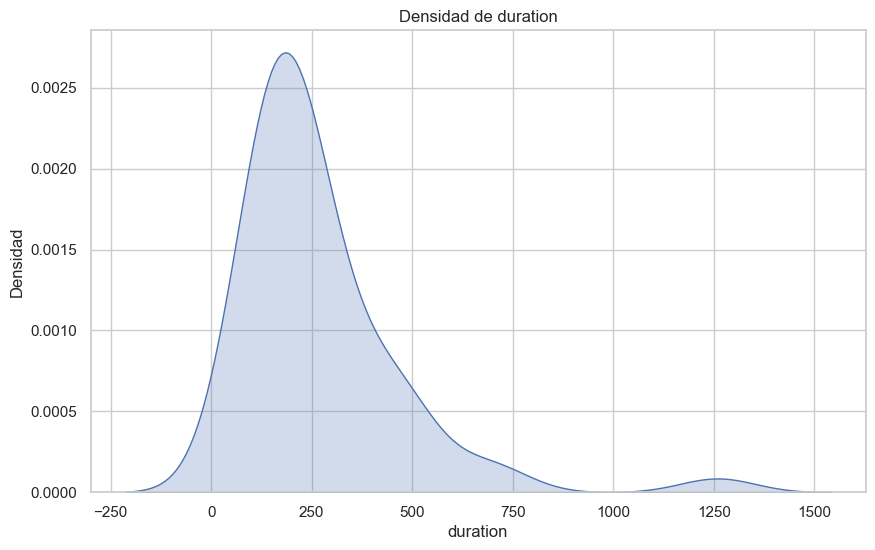

C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


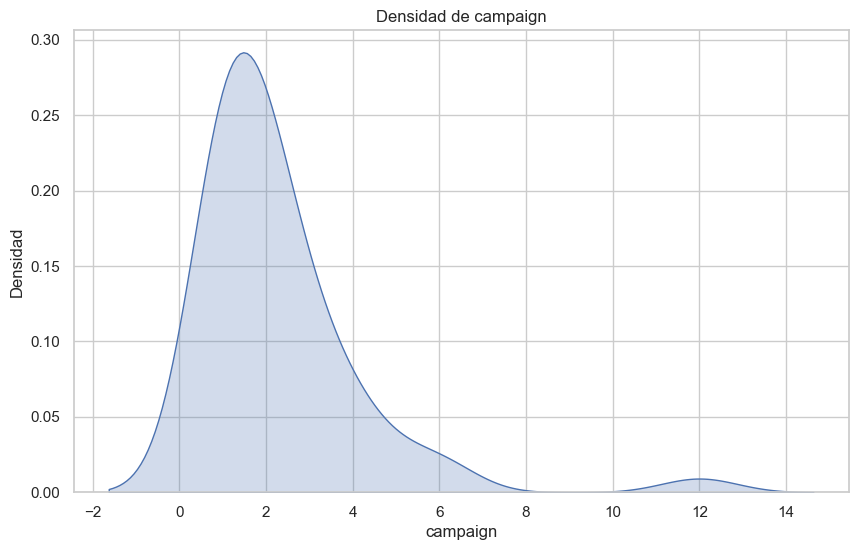

C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


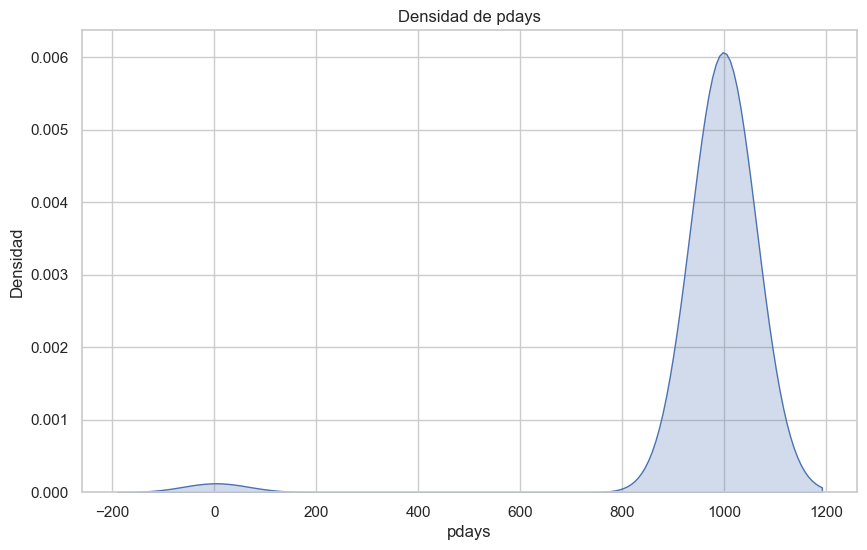

C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


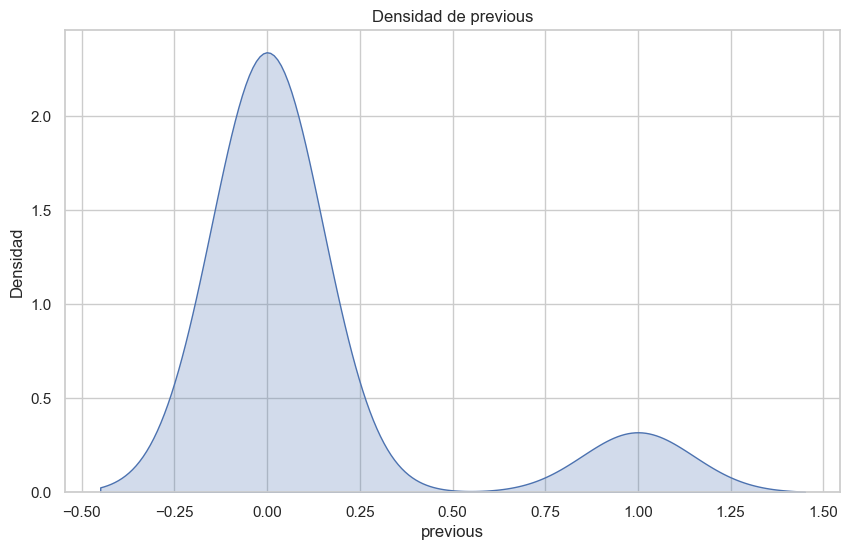

C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


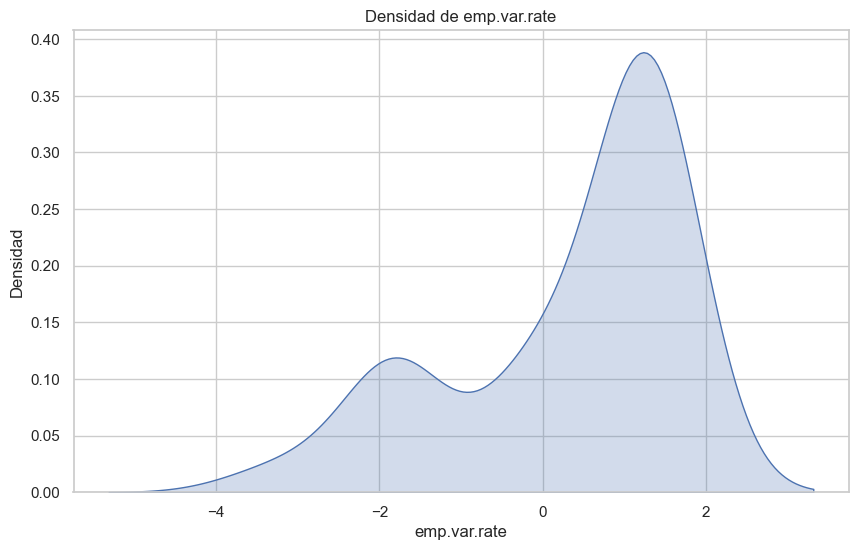

C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


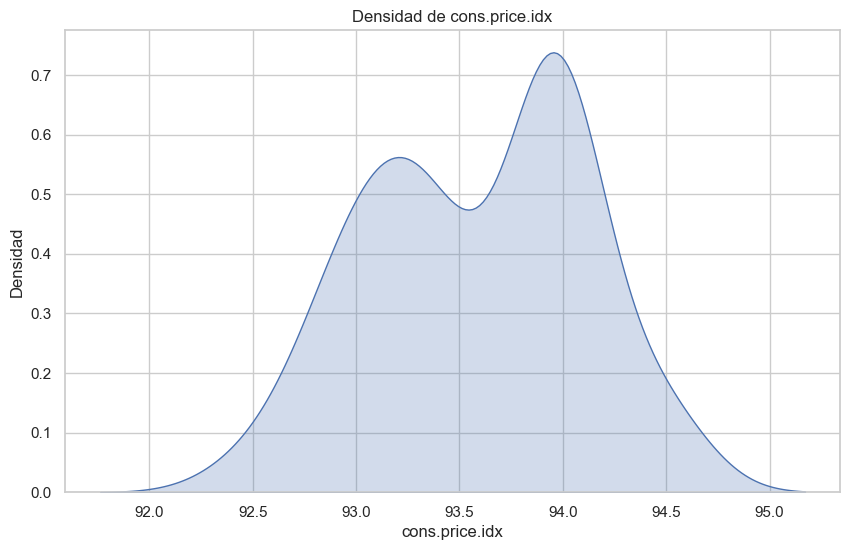

C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


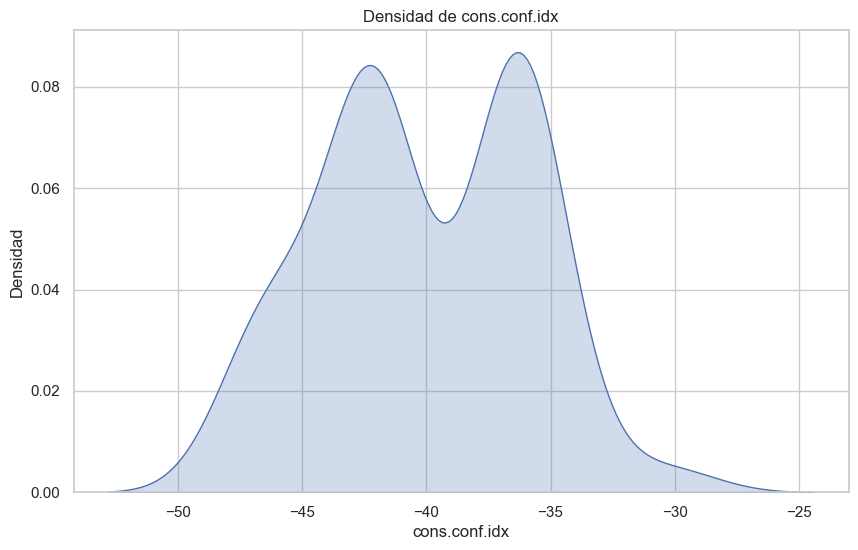

C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


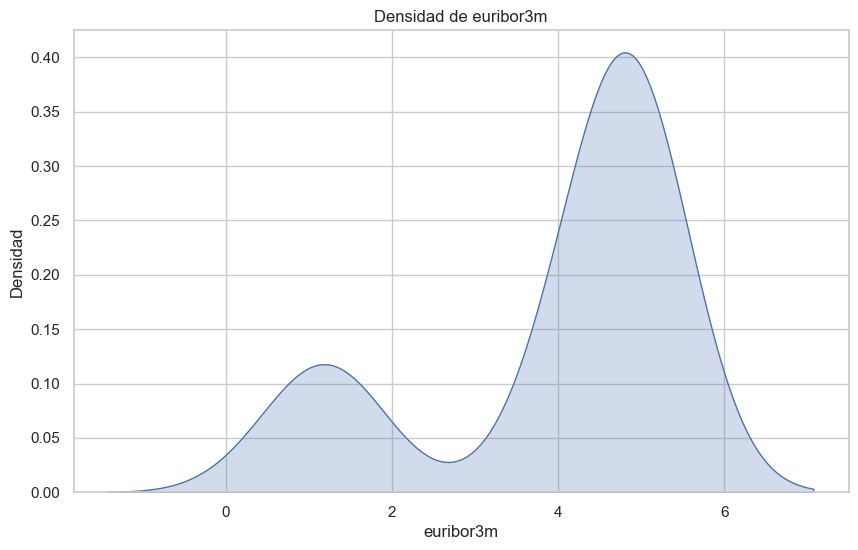

C:\Users\56965\AppData\Local\Temp\ipykernel_3948\396853415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


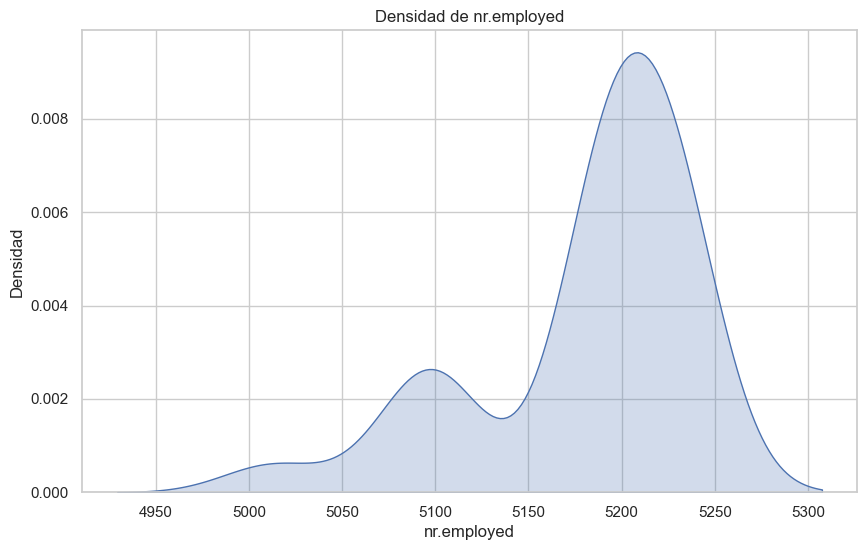

In [52]:
# Crear gráficos de densidad para cada columna numérica desde df
for column in df_numerico.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_numerico[column], shade=True)
    plt.title(f'Densidad de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.show()

In [53]:
# Como se puede observar en los gráficos, la mayoría no se comportan de manera simértica o parecido a la camparana de Gauss
# Por lo que no se puede afirmar que éstas siguen una distribución normal, si bien las variables Duracion y Campaign, podrían ser simétricas,
# estas presentan outliers o puntos atípicos.
# Por otra parte, la variable pdays está altamente influenciada por el valor 999 que es simplemente un indicador. 
# En este sentido y dado el comportamiento de los datos, sólo se procederá a transformar estos datos con min max Scaler


# Mostrar las columnas numéricas de df

numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

# Sin considerar Unnamed 0  ni id, Inicializar la transformación MinMaxScaler para los datos analizados anteriormente

for col in ['duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']:
    minmax = MinMaxScaler()
    x_scaler = minmax.fit_transform(df[[col]])
    df[col] = x_scaler


Index(['Unnamed: 0', 'id', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')


In [54]:
# Por último df con datos normalizados
df.head(6)

,Unnamed: 0,id,age,job,marital,education,default,housing,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,2292,51 years,entrepreneur,divorced,university degree,no,yes,telephone,may,...,0.136860,0.000000,1.0,1.0,failure,0.333333,0.212425,0.052941,0.140951,0.412033
1,1536,1536,37 years,management,married,university degree,no,yes,cellular,august,...,0.163728,0.090909,1.0,0.0,not existent,1.000000,0.488477,0.647059,1.000000,1.000000
2,4047,4047,38 years,blue-collar,married,basic 4y,,no,telephone,june,...,0.022670,0.090909,1.0,0.0,not existent,1.000000,1.000000,0.311765,0.997893,1.000000
3,3862,3862,52 years,technician,married,professional course,no,yes,cellular,november,...,0.358522,0.000000,0.0,1.0,success,0.000000,0.090180,1.000000,0.003980,0.040109
4,1340,1340,32 years,admin.,married,university degree,no,yes,cellular,august,...,0.302267,0.272727,1.0,0.0,not existent,1.000000,0.488477,0.647059,0.999063,1.000000
5,3686,3686,45 years,technician,married,basic 9y,,no,cellular,november,...,0.089001,0.000000,1.0,0.0,not existent,0.687500,0.366232,0.300000,0.778272,0.852780


## 5.- Generar archivo de salida en formato csv o excel (3 ptos.):


Respuesta:
---
    
    


In [55]:
# Guardar el DataFrame transformado en un archivo CSV
df.to_csv('df.csv', index=False)

# Verificar la creación del archivo CSV
os.listdir()


['.ipynb_checkpoints',
 'bank-A.csv',
 'bank-additional-names.txt',
 'bank-B.csv',
 'bank-C.csv',
 'df.csv',
 'Miniproyecto1.ipynb',
 'output.csv']